## SRPT vs. BASRPT vs. Random

In [106]:
%load_ext autoreload
import trafpy
import trafpy.generator as tpg

import os
import pickle

DATA_NAME = 'ndf50_1s_university'
# DATA_NAME = 'ndf50_mldat6e6_load0.4_university'
path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/testbed_data/{}_testbed_data.obj'.format(DATA_NAME)
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [107]:
%autoreload
# unpack env dicts into list of env objects
envs = tb_dict['envs']



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.1_repeat_0_scheduler_srpt'
Measurement duration: 70972716.2079827 (Start time : 8871589.525997838 | End time: 79844305.73398054)
Total number of generated demands (jobs or flows) passed to env: 6000
Total number of these demands which arrived during measurement period: 4830
Total info arrived: 83343338.0 info unit demands arrived
Total info transported: 5872212.0 info unit demands transported
Load (abs): 1.174301089953577 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.0978584241627981 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 0.08273900611034411 info units transported per unit time
Throughput (frac): 0.07045808508413715 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_dep'



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.8_repeat_0_scheduler_srpt'
Measurement duration: 59239150.2400002 (Start time : 7404893.780000025 | End time: 66644044.02000023)
Total number of generated demands (jobs or flows) passed to env: 24000
Total number of these demands which arrived during measurement period: 19171
Total info arrived: 506913062.0 info unit demands arrived
Total info transported: 6281446.0 info unit demands transported
Load (abs): 8.557061671990626 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.7130884726658855 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 0.10603538326514622 info units transported per unit time
Throughput (frac): 0.012391564690041466 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'data_



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.2_repeat_0_scheduler_basrpt'
Measurement duration: 62482287.27415267 (Start time : 7810285.909269083 | End time: 70292573.18342175)
Total number of generated demands (jobs or flows) passed to env: 12000
Total number of these demands which arrived during measurement period: 9615
Total info arrived: 145794867.0 info unit demands arrived
Total info transported: 11179146.0 info unit demands transported
Load (abs): 2.3333791600857676 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.19444826334048063 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 0.17891704173615502 info units transported per unit time
Throughput (frac): 0.07667722622909626 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'd



-=-=-=-=-=-=--= Summary -=-=-=-=-=-=-=-

 ~* General Information *~
Simulation name: 'benchmark_university_load_0.3_repeat_0_scheduler_random'
Measurement duration: 65241638.77057901 (Start time : 8155204.846322376 | End time: 73396843.61690138)
Total number of generated demands (jobs or flows) passed to env: 12000
Total number of these demands which arrived during measurement period: 9601
Total info arrived: 201688179.0 info unit demands arrived
Total info transported: 3176242.0 info unit demands transported
Load (abs): 3.0914027115295597 info unit demands arrived per unit time (from first to last flow arriving)
Load (frac): 0.2576168926274633 fraction of network capacity requested (from first to last flow arriving)
Throughput (abs): 0.04868427678785315 info units transported per unit time
Throughput (frac): 0.015748280418556408 fraction of arrived info successfully transported

 ~* Flow Information *~
Total number of generated flows passed to env (src != dst, dependency_type == 'da

/home/cwfparsonson/Insync/zciccwf@ucl.ac.uk/OneDriveBiz/ipes_cdt/phd_project/projects/trafpy/trafpy/generator/src/dists/plot_dists.py:446: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to spec

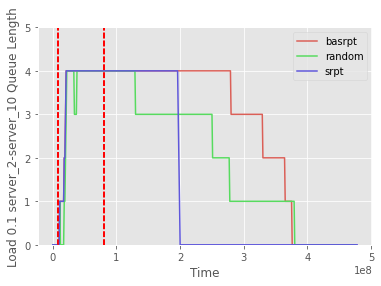

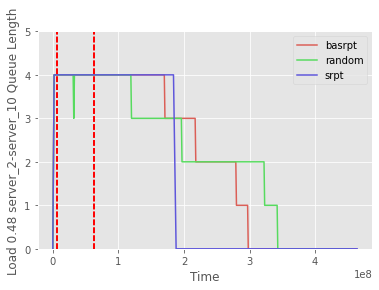

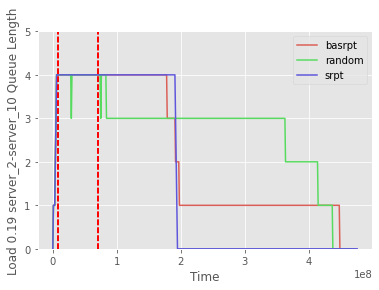

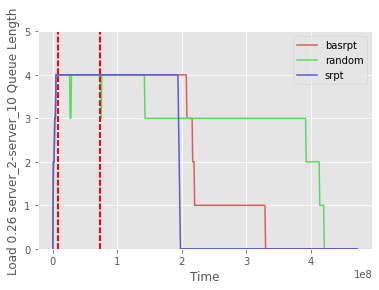

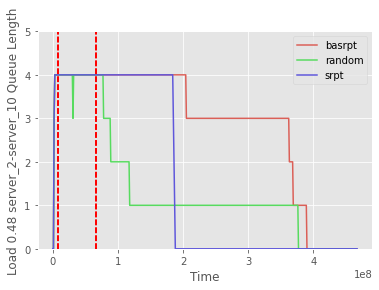

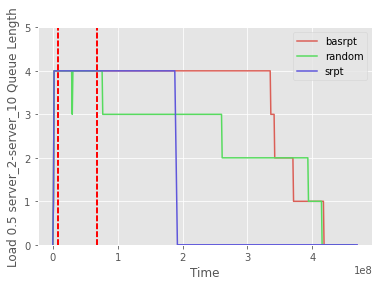

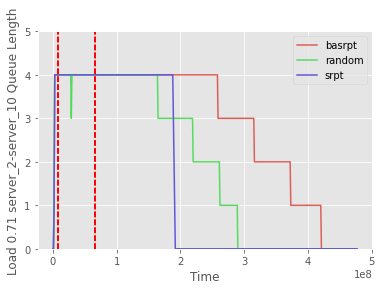

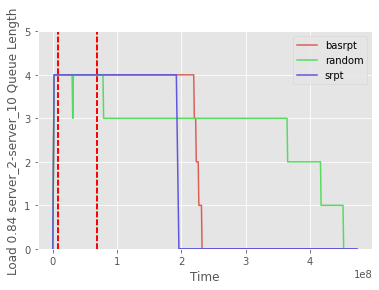

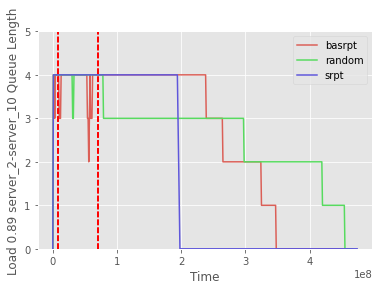

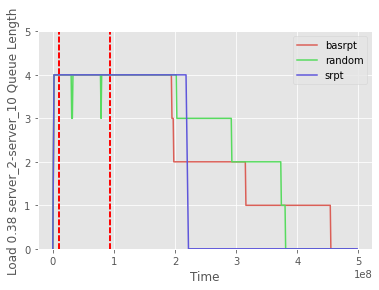

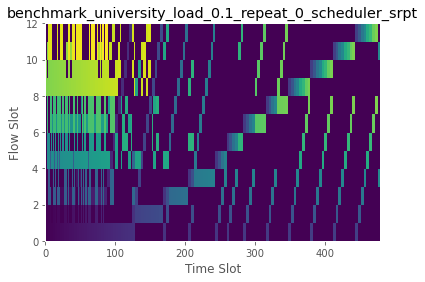

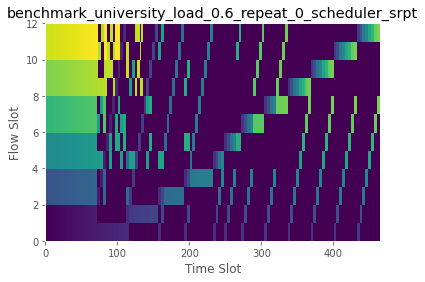

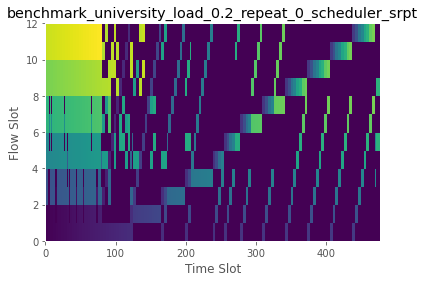

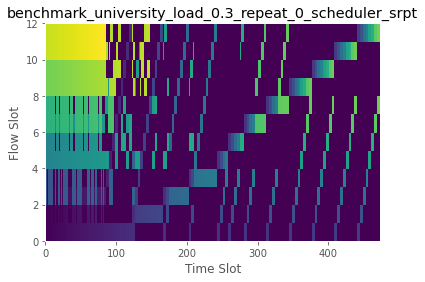

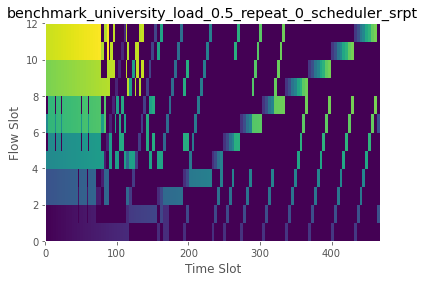

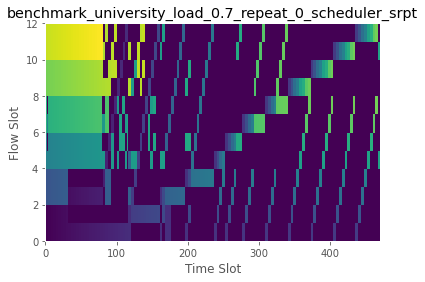

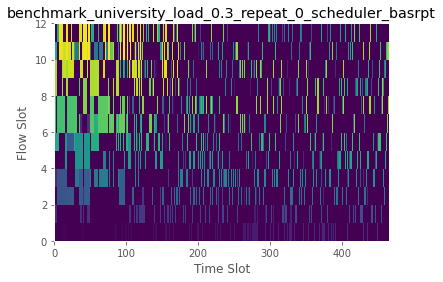

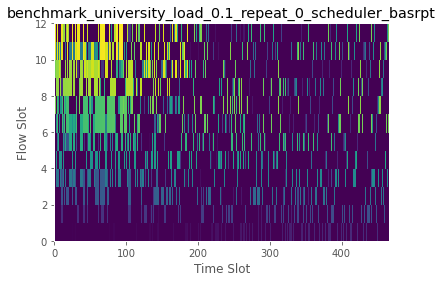

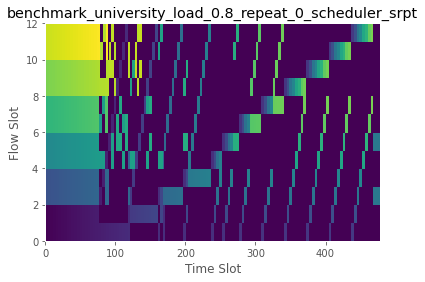

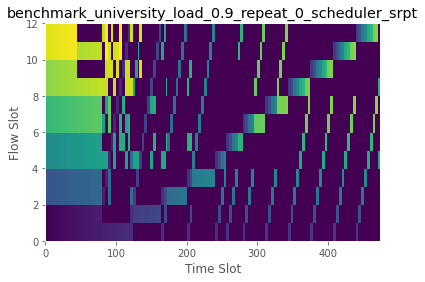

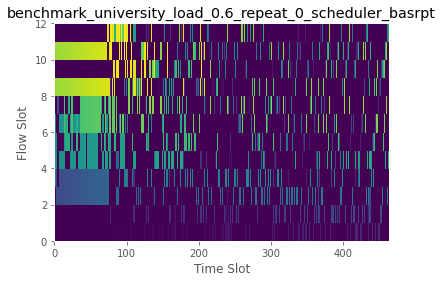

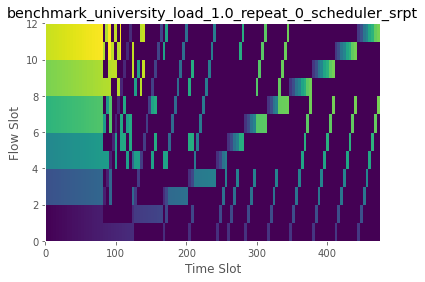

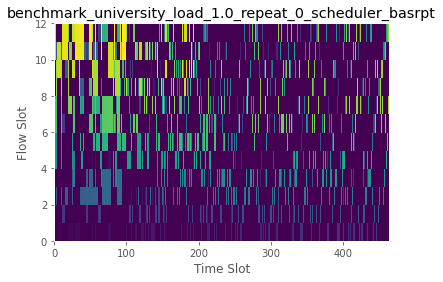

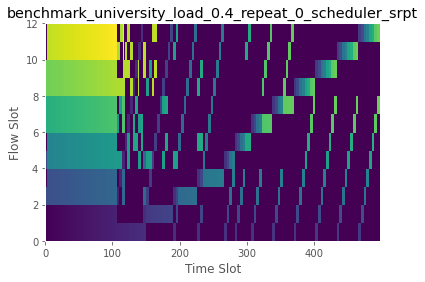

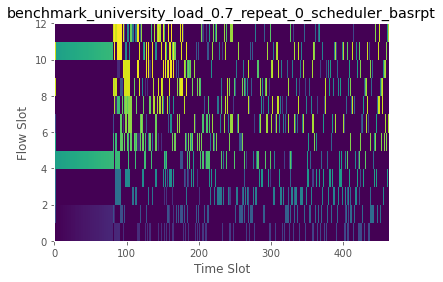

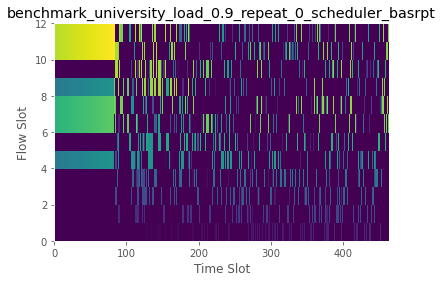

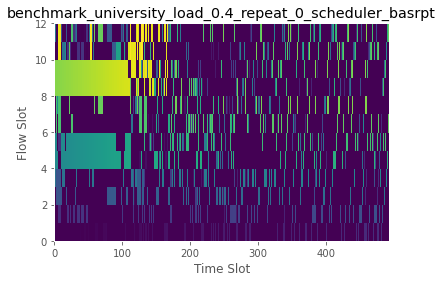

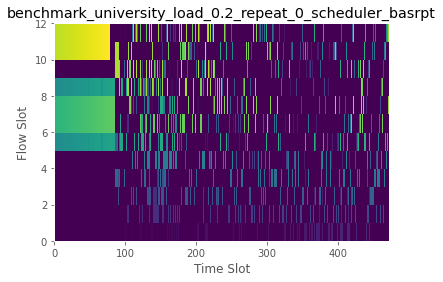

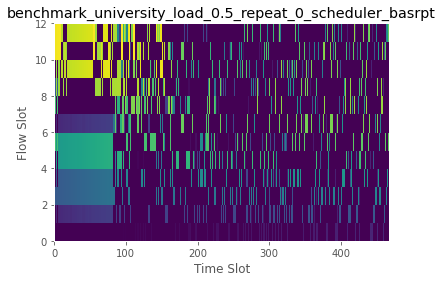

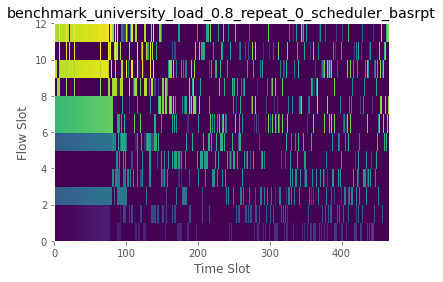

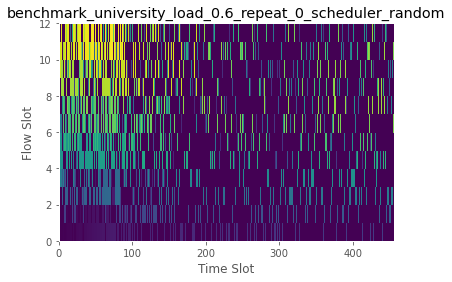

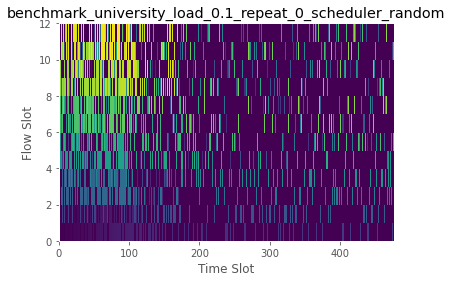

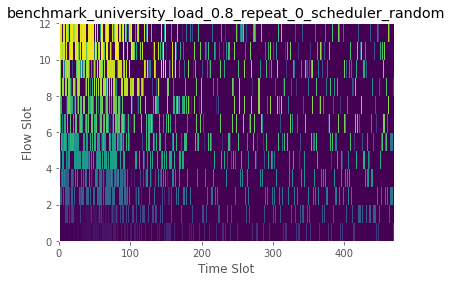

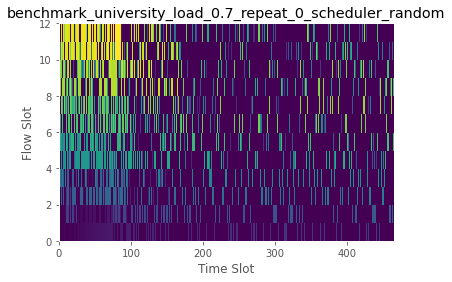

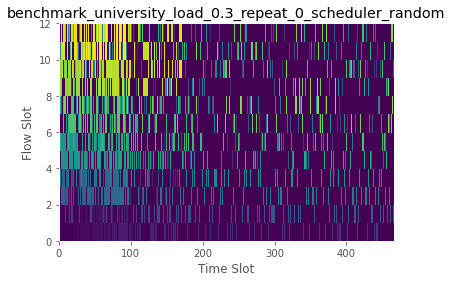

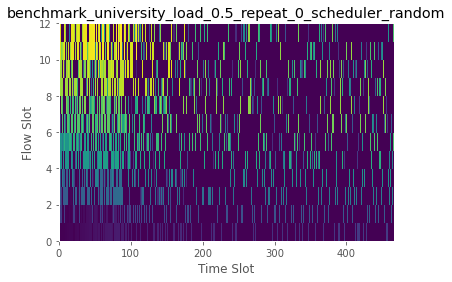

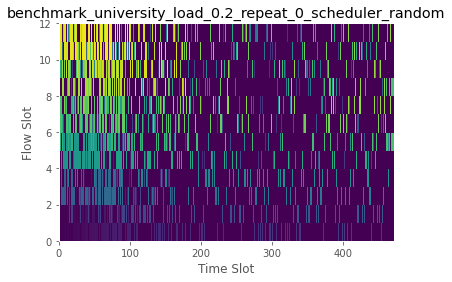

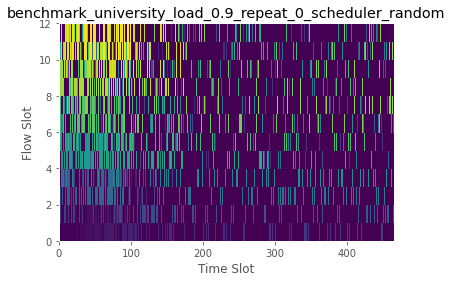

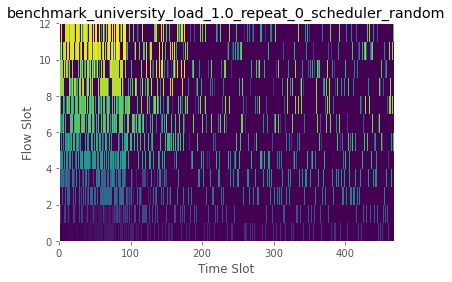

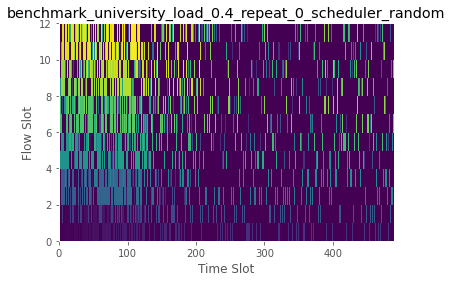

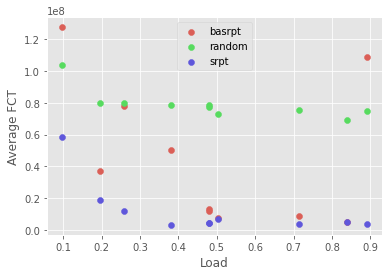

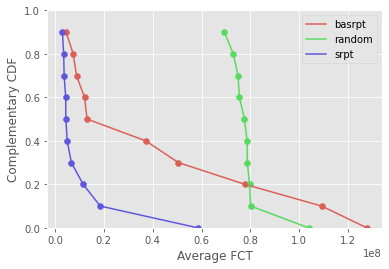

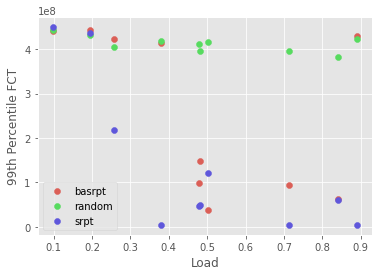

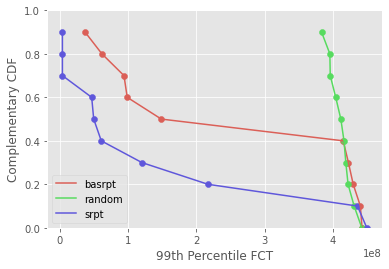

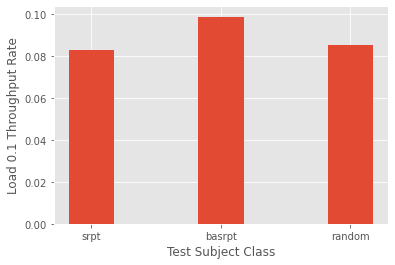

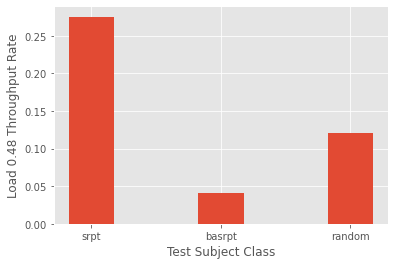

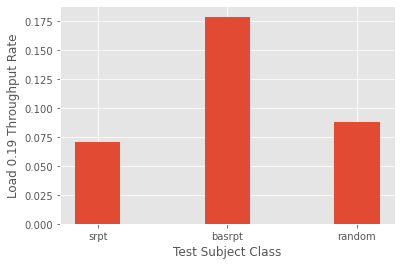

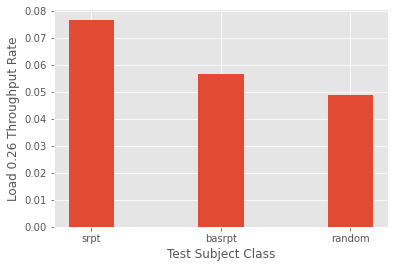

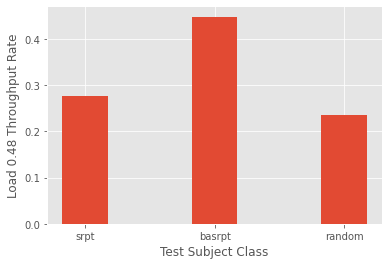

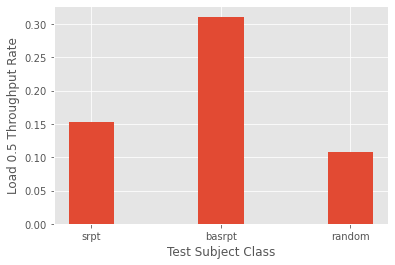

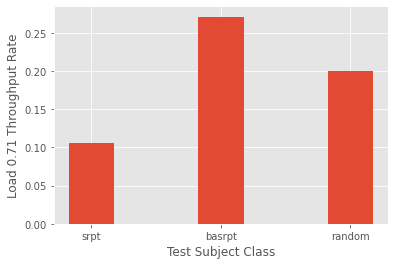

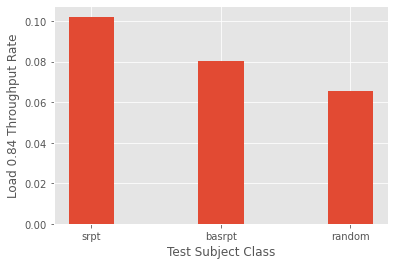

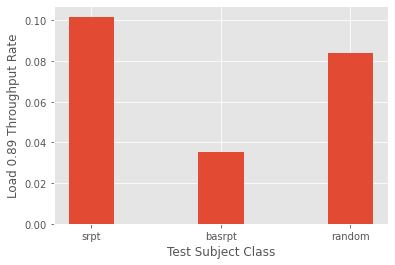

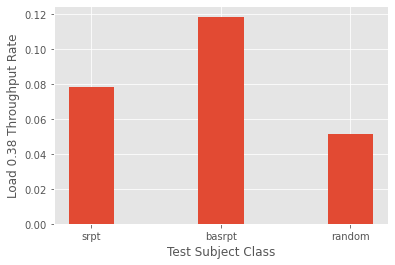

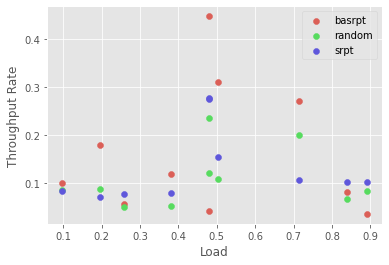

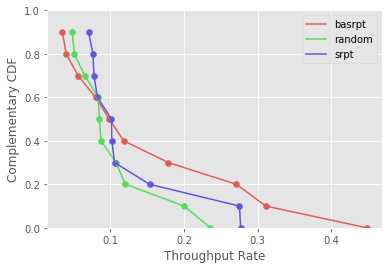

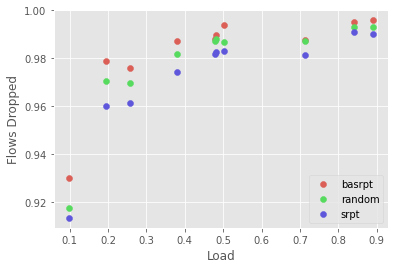

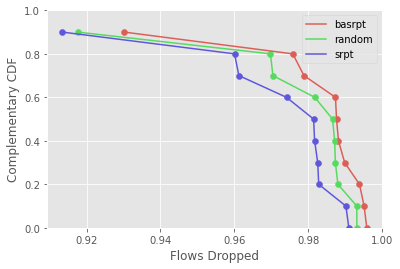

In [109]:
%autoreload
import trafpy
from trafpy.manager import EnvAnalyser, EnvsPlotter

# analyse
analysers = [EnvAnalyser(env, env.scheduler.scheduler_name) for env in envs]
for analyser in analysers:
    analyser.compute_metrics(measurement_start_time='auto',
                             measurement_end_time='auto',
                             print_summary=True)
# plot
plotter = EnvsPlotter()
_ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_num_flows', *analysers)
# _ = plotter.plot_src_dst_queue_evolution_for_different_loads('server_2', 'server_10', 'queue_lengths_info_units', *analysers)
_ = plotter.plot_demand_slot_colour_grid_for_different_schedulers(*analysers)
_ = plotter.plot_average_fct_vs_load(*analysers)
_ = plotter.plot_99th_percentile_fct_vs_load(*analysers)
_ = plotter.plot_throughput_vs_load(*analysers)
_ = plotter.plot_fraction_of_arrived_flows_dropped_vs_load(*analysers)

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import seaborn as sns

def plot_demand_slot_colour_grid(data, time_slots, demand_slots, num_classes, show_figure=False):

    # set colours
    class_colours = sns.color_palette(palette='hls', n_colors=num_classes, desat=None)
#     cmap = colors.ListedColormap(class_colours)
    cmap=None

    # plot grid
    fig, ax = plt.subplots()
    c = ax.pcolor(data, cmap=cmap)

    plt.xlabel('Time Slot')
    plt.ylabel('Flow Slot')

    plt.show()

srpt
demand to id:
{None: 0, 'flow_5': 1, 'flow_26': 2, 'flow_0': 3, 'flow_3': 4, 'flow_11': 5, 'flow_15': 6, 'flow_20': 7, 'flow_24': 8, 'flow_32': 9, 'flow_10': 10, 'flow_1': 11, 'flow_16': 12, 'flow_30': 13, 'flow_6': 14, 'flow_25': 15, 'flow_7': 16, 'flow_14': 17}
(12, 11)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[ 0  0  0  1  0  0  0  0  2  0  0]
 [ 0  3  4  0  0  5  6  7  0  0  0]
 [ 0  0  0  0  0  5  6  0  0  8  9]
 [ 0  3  0  1 10  0  0  0  2  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0]
 [ 0 11  0  0  0  0 12  0  0 13  0]
 [ 0  0  0 14  0  0  0  0 15  0  0]
 [ 0  0  4  0  0  0 12  0  0 13  9]
 [ 0  0  0  0 16 16  0  7 15  0  0]
 [ 0  0  0 14  0  0 17  0  0  8  0]
 [ 0  0  0  0 16 16  0  0  0  0  0]
 [ 0 11  0  0  0  0 17  0  0  0  0]]


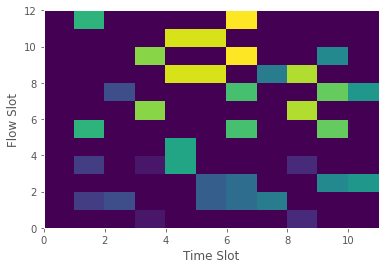

In [100]:
env = envs[0]
print(env.scheduler.scheduler_name)

# print(env.grid_slot_dict)
grid_demands = []
for ep in env.grid_slot_dict.keys():
    for channel in env.grid_slot_dict[ep].keys():
        grid_demands.append(env.grid_slot_dict[ep][channel]['demands'])
grid_demands = np.array([np.array(xi) for xi in grid_demands])

# conv grid demands to integer ids
unique_id_counter = 0
demand_to_id = {}
for slot_idx in range(len(grid_demands)):
    for time_idx in range(len(grid_demands[slot_idx])):
        d = grid_demands[slot_idx][time_idx]
        if d not in demand_to_id.keys():
            # not yet encountered demand, update demand_to_id dict
            demand_to_id[d] = unique_id_counter
            unique_id_counter += 1
            # update grid_demands
            grid_demands[slot_idx][time_idx] = demand_to_id[d]
        else:
            # update grid_demands
            grid_demands[slot_idx][time_idx] = demand_to_id[d]
grid_demands = grid_demands.astype(int)
print('demand to id:\n{}'.format(demand_to_id))

print(grid_demands.shape)
print(type(grid_demands))
print(type(grid_demands[0]))
print(grid_demands)


# get data params
flow_slots = grid_demands.shape[0]
time_slots = grid_demands.shape[1]
num_classes = flow_slots






# define data
# time_slots = 10
# flow_slots = 12
# num_classes = 12

Z = np.random.rand(flow_slots, time_slots) * num_classes
Z = Z.astype(int)
# print(Z.shape)
# print(type(Z))
# print(type(Z[0]))
# print(Z)

# plot
plot_demand_slot_colour_grid(grid_demands, time_slots=time_slots, demand_slots=flow_slots, num_classes=num_classes, show_figure=True)

In [ ]:
edges = env.network.edges
print(edges)